## **1) Leitura do dataset:**

In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import os
from matplotlib import ticker

NOTEBOOK_DIR = os.getcwd()
BASE_DIR = os.path.dirname(NOTEBOOK_DIR)
FIG_DIR = os.path.join(BASE_DIR, "reports", "figures")

nome_real_do_arquivo = 'spotify-2023.csv' 
caminho_do_arquivo = f'../data/raw/{nome_real_do_arquivo}'


df = pd.read_csv(
    caminho_do_arquivo,
    sep=',',           
    encoding='latin-1',
    low_memory=False
)


## **2) Transformação de tipos:**

In [473]:
#Transformação de int para float nas porcentagens
cols_pct = [
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
]
df[cols_pct] = df[cols_pct].astype(float)

#Transformação dos tipos key e mode para category para economizar memoria
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')

#Transformação das colunas de released em apenas uma coluna chamada releasedData
df['released_date'] = pd.to_datetime(
    df['released_year'].astype(str) + '-' +
    df['released_month'].astype(str) + '-' +
    df['released_day'].astype(str),
    errors='coerce'
)
df = df.drop(columns=['released_year', 'released_month', 'released_day'])

#Transformação do tipo do atributo stream para númerico
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors='coerce')
df['in_apple_charts'] = pd.to_numeric(df['in_apple_charts'], errors='coerce')
df['in_deezer_charts'] = pd.to_numeric(df['in_deezer_charts'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

## **3) Composição dos dados:**

In [474]:
colunas_tabela = ['Nome da Variável', 'Tipo', 'Descrição', 'Unidades', 'Valores Faltantes']

data_spotify = [

    ['track_name', 'Textual', 'Nome da música.', 'N/A', df['track_name'].isna().sum()],
    ['artist(s)_name', 'Textual', 'Nome dos artistas.', 'N/A', df['artist(s)_name'].isna().sum()],
    ['artist_count', 'Numérico Discreto', 'Quantidade de artistas envolvidos.', 'Contagem', df['artist_count'].isna().sum()],

    ['released_date', 'Data', 'Data completa de lançamento.', 'Data', df['released_date'].isna().sum()],

    ['in_spotify_playlists', 'Numérico Discreto', 'Quantidade de playlists do Spotify contendo a música.', 'Contagem', df['in_spotify_playlists'].isna().sum()],
    ['in_spotify_charts', 'Numérico Discreto', 'Posição ou presença em charts do Spotify.', 'Contagem', df['in_spotify_charts'].isna().sum()],
    ['streams', 'Numérico Discreto', 'Total de streams da música.', 'Contagem', df['streams'].isna().sum()],

    ['in_apple_playlists', 'Numérico Discreto', 'Quantidade de playlists da Apple contendo a música.', 'Contagem', df['in_apple_playlists'].isna().sum()],
    ['in_apple_charts', 'Numérico Discreto', 'Posição ou presença em charts da Apple.', 'Contagem', df['in_apple_charts'].isna().sum()],

    ['in_deezer_playlists', 'Numérico Discreto', 'Quantidade de playlists do Deezer contendo a música.', 'Contagem', df['in_deezer_playlists'].isna().sum()],
    ['in_deezer_charts', 'Numérico Discreto', 'Posição ou presença em charts do Deezer.', 'Contagem', df['in_deezer_charts'].isna().sum()],

    ['in_shazam_charts', 'Numérico Discreto', 'Posição ou presença nos charts do Shazam.', 'Contagem', df['in_shazam_charts'].isna().sum()],

    ['bpm', 'Numérico Contínuo', 'Batidas por minuto da música.', 'BPM', df['bpm'].isna().sum()],
    ['key', 'Categórico', 'Tom da música.', 'N/A', df['key'].isna().sum()],
    ['mode', 'Categórico Binário', 'Modo musical (maior=1, menor=0).', 'N/A', df['mode'].isna().sum()],

    ['danceability_%', 'Numérico Contínuo', 'Quão dançante é a música.', '%', df['danceability_%'].isna().sum()],
    ['valence_%', 'Numérico Contínuo', 'Valência emocional.', '%', df['valence_%'].isna().sum()],
    ['energy_%', 'Numérico Contínuo', 'Energia geral da música.', '%', df['energy_%'].isna().sum()],
    ['acousticness_%', 'Numérico Contínuo', 'Quantidade de acústica.', '%', df['acousticness_%'].isna().sum()],
    ['instrumentalness_%', 'Numérico Contínuo', 'Probabilidade de ser instrumental.', '%', df['instrumentalness_%'].isna().sum()],
    ['liveness_%', 'Numérico Contínuo', 'Probabilidade de ser ao vivo.', '%', df['liveness_%'].isna().sum()],
    ['speechiness_%', 'Numérico Contínuo', 'Presença de fala na música.', '%', df['speechiness_%'].isna().sum()]
]

instancias, atributos = df.shape

print("Instâncias:", instancias)
print("Atributos:", atributos)
print("Periodo de tempo: 2023")

df_tabela = pd.DataFrame(data_spotify, columns=colunas_tabela)
df_tabela


Instâncias: 953
Atributos: 22
Periodo de tempo: 2023


,Nome da Variável,Tipo,Descrição,Unidades,Valores Faltantes
0,track_name,Textual,Nome da música.,N/A,0
1,artist(s)_name,Textual,Nome dos artistas.,N/A,0
2,artist_count,Numérico Discreto,Quantidade de artistas envolvidos.,Contagem,0
3,released_date,Data,Data completa de lançamento.,Data,0
4,in_spotify_playlists,Numérico Discreto,Quantidade de playlists do Spotify contendo a ...,Contagem,0
5,in_spotify_charts,Numérico Discreto,Posição ou presença em charts do Spotify.,Contagem,0
6,streams,Numérico Discreto,Total de streams da música.,Contagem,1
7,in_apple_playlists,Numérico Discreto,Quantidade de playlists da Apple contendo a mú...,Contagem,0
8,in_apple_charts,Numérico Discreto,Posição ou presença em charts da Apple.,Contagem,0
9,in_deezer_playlists,Numérico Discreto,Quantidade de playlists do Deezer contendo a m...,Contagem,0


## **4) Tratamento de dados faltantes e duplicados:**

In [475]:
#tratando os dados inexistentes da coluna key
df['key'] = df['key'].cat.add_categories('Unknown')
df['key'] = df['key'].fillna('Unknown').astype('category')

#tratando os dados inexistentes da coluna in_shazam_charts
df.replace({'in_shazam_charts': ['', ' ', 'nan', 'NULL', 'NA']}, np.nan, inplace=True)
df = df.dropna(subset=['in_shazam_charts'])

#tratando os dados inexistentes da coluna streams
df.replace({'streams': ['', ' ', 'nan', 'NULL', 'NA']}, np.nan, inplace=True)
df = df.dropna(subset=['streams'])

missing = df.isnull().sum().to_frame("faltantes")
missing["percentual"] = (missing["faltantes"] / len(df)) * 100
print(missing)

#verificação de linha duplicada
duplicatas = df.duplicated()
print("Número de linhas duplicadas:", duplicatas.sum())



df.head(10)


                      faltantes  percentual
track_name                    0         0.0
artist(s)_name                0         0.0
artist_count                  0         0.0
in_spotify_playlists          0         0.0
in_spotify_charts             0         0.0
streams                       0         0.0
in_apple_playlists            0         0.0
in_apple_charts               0         0.0
in_deezer_playlists           0         0.0
in_deezer_charts              0         0.0
in_shazam_charts              0         0.0
bpm                           0         0.0
key                           0         0.0
mode                          0         0.0
danceability_%                0         0.0
valence_%                     0         0.0
energy_%                      0         0.0
acousticness_%                0         0.0
instrumentalness_%            0         0.0
liveness_%                    0         0.0
speechiness_%                 0         0.0
released_date                 0 

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703.0,43,263,45,10,...,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286.0,48,126,58,14,...,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974.0,94,207,91,14,...,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817.0,116,207,125,12,...,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322.0,84,133,87,15,...,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0,2023-05-18
5,Sprinter,"Dave, Central Cee",2,2186,91,183706234.0,67,213,88,17,...,C#,Major,92.0,66.0,58.0,19.0,0.0,8.0,24.0,2023-06-01
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,3090,50,725980112.0,34,222,43,13,...,F,Minor,67.0,83.0,76.0,48.0,0.0,8.0,3.0,2023-03-16
7,Columbia,Quevedo,1,714,43,58149378.0,25,89,30,13,...,F,Major,67.0,26.0,71.0,37.0,0.0,11.0,4.0,2023-07-07
8,fukumean,Gunna,1,1096,83,95217315.0,60,210,48,11,...,C#,Minor,85.0,22.0,62.0,12.0,0.0,28.0,9.0,2023-05-15
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2953,44,553634067.0,49,110,66,13,...,D,Minor,81.0,56.0,48.0,21.0,0.0,8.0,33.0,2023-03-17


## **5) Estatísticas e visualizações simples sobre os conjuntos de dados:**

### **5.1) Identificação de Outliers em relação ao número de streams**

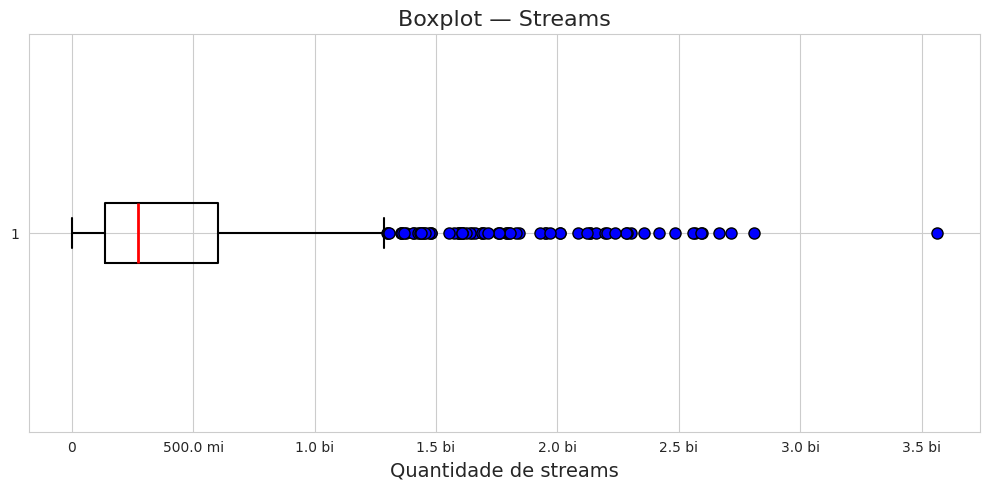

In [476]:
def formatar_bilhoes(x, pos):
    if x >= 1e9:
        return f"{x/1e9:.1f} bi"
    elif x >= 1e6:
        return f"{x/1e6:.1f} mi"
    elif x >= 1e3:
        return f"{x/1e3:.1f} mil"
    return f"{x:.0f}"

plt.figure(figsize=(10, 5))

plt.boxplot(
    df['streams'].dropna(),
    vert=False,
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    medianprops=dict(color='red', linewidth=2),
    flierprops=dict(
        marker='o', 
        markersize=8, 
        markeredgecolor='black',
        markerfacecolor='blue'
    )
)

plt.title("Boxplot — Streams", fontsize=16)
plt.xlabel("Quantidade de streams", fontsize=14)

plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_bilhoes))

plt.tight_layout()

plt.savefig(os.path.join(FIG_DIR, "boxplot_streams.png"), dpi=300)
plt.show()

### **5.2) Top 10 artistas mais ouvidos em 2023:**

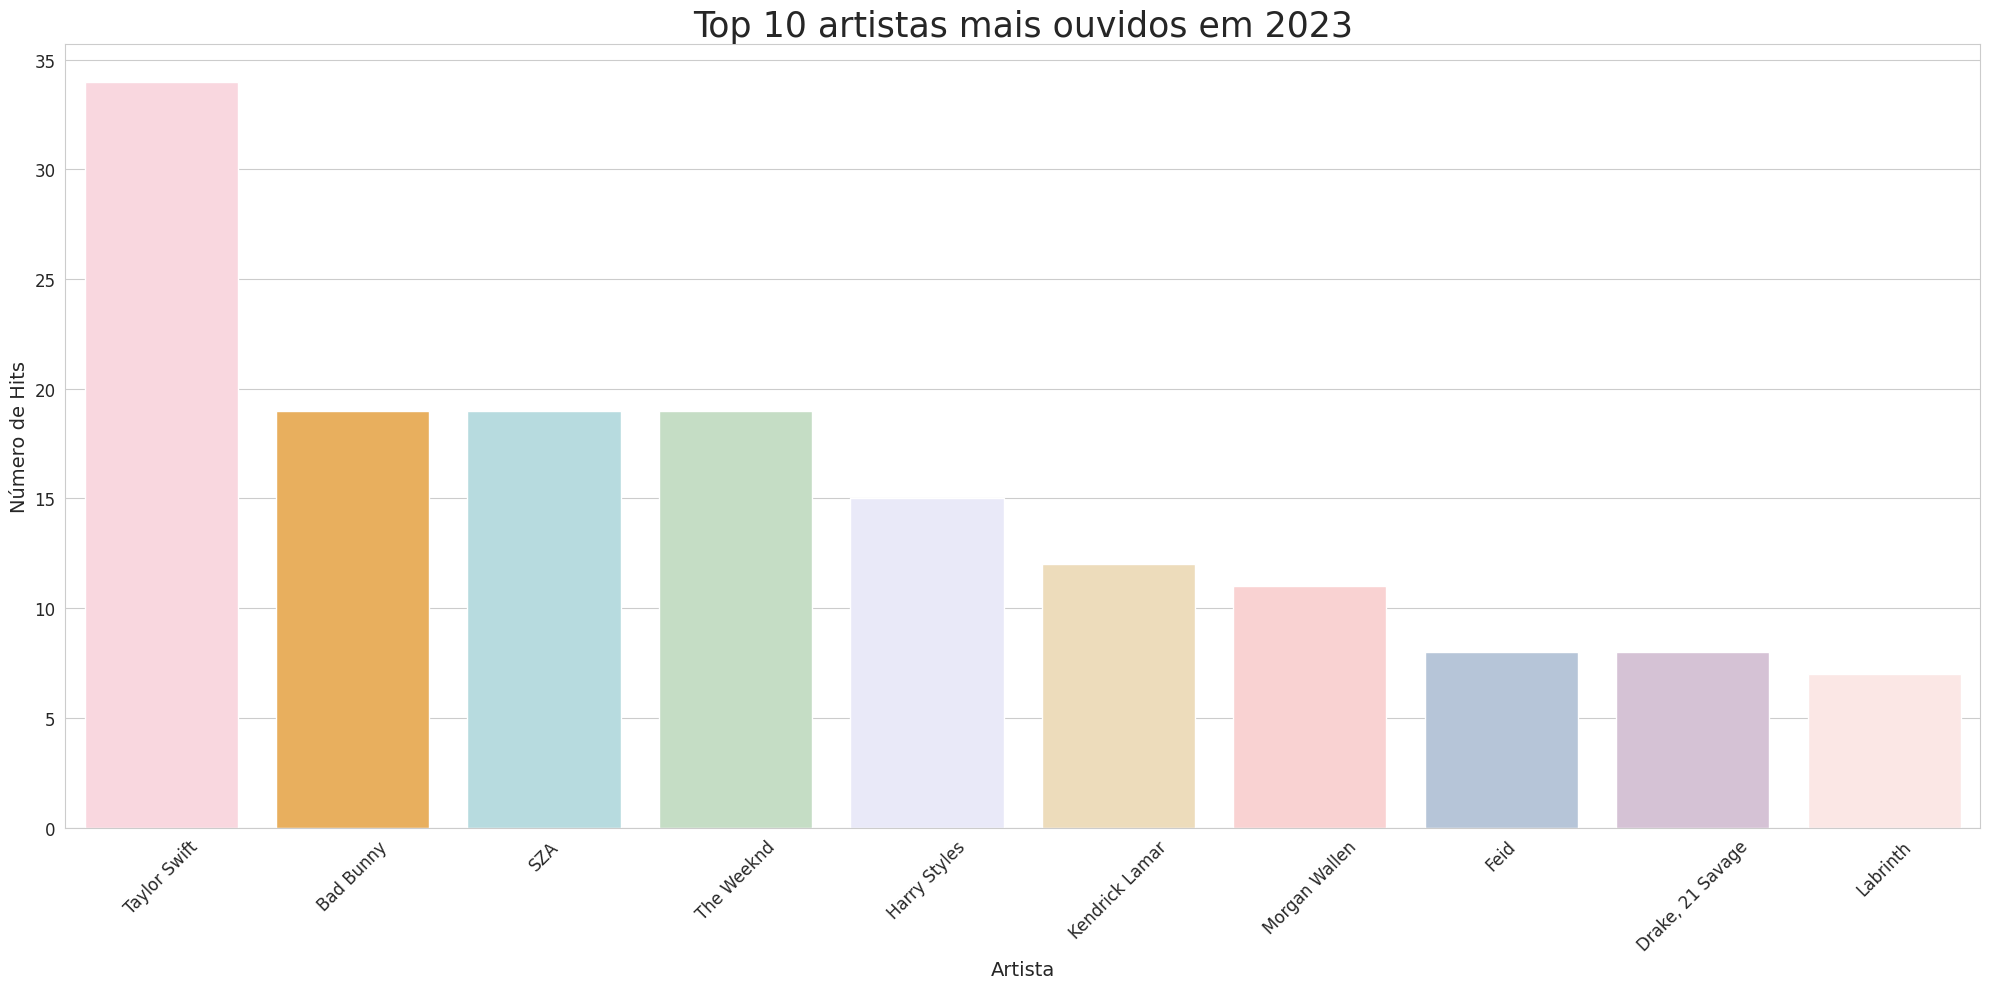

In [477]:

artist_counts = df['artist(s)_name'].value_counts()
top_artists = artist_counts.head(10)
colors = ['#FFD1DC', '#FFB347', '#B0E0E6', '#C1E1C1', '#E6E6FA',
          '#F5DEB3', '#FFCCCC', '#B0C4DE', '#D8BFD8', '#FFE4E1']

plot_data = pd.DataFrame({
    'artist': top_artists.index,
    'hits': top_artists.values,
    'color': colors 
})

plt.figure(figsize=(20,10))
sns.barplot(
    x='artist',
    y='hits',
    data=plot_data,
    hue='artist',      
    palette=colors,     
    dodge=False
)
plt.legend([],[], frameon=False)
plt.title('Top 10 artistas mais ouvidos em 2023', fontsize=25)
plt.xlabel('Artista', fontsize=14)
plt.ylabel('Número de Hits', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "top_artistas_mais_ouvidos.png"), dpi=300)
plt.show()


### **5.3) Top 10 músicas mais ouvidas em 2023:**

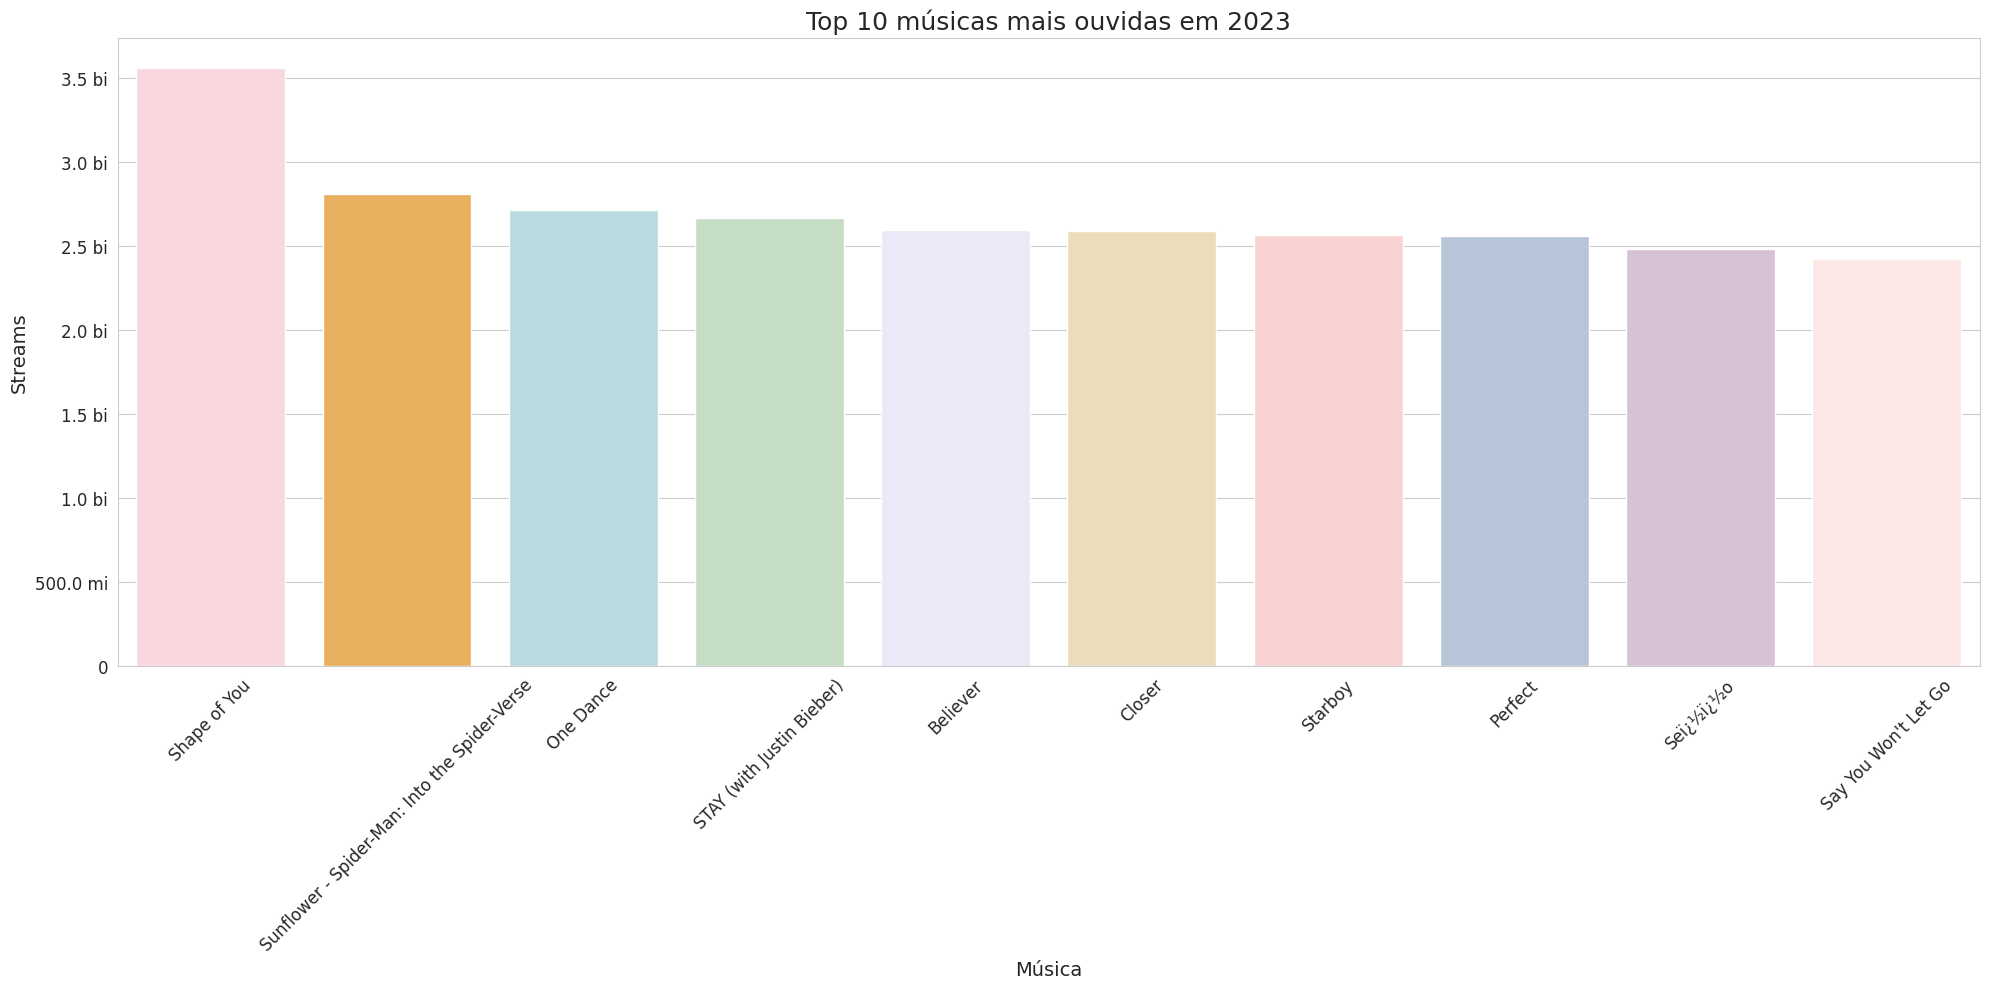

In [478]:

top_songs = df[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

colors = ['#FFD1DC', '#FFB347', '#B0E0E6', '#C1E1C1', '#E6E6FA',
          '#F5DEB3', '#FFCCCC', '#B0C4DE', '#D8BFD8', '#FFE4E1']

plot_data = pd.DataFrame({
    'track': top_songs['track_name'],
    'streams': top_songs['streams'],
    'color': colors
})

plt.figure(figsize=(20, 10))

sns.barplot(
    x='track',
    y='streams',
    data=plot_data,
    hue='track',       
    palette=colors,
    dodge=False
)

plt.legend([], [], frameon=False)
plt.title('Top 10 músicas mais ouvidas em 2023', fontsize=18)
plt.xlabel('Música', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_bilhoes))

plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "top_musicas_mais_ouvidos.png"), dpi=300)
plt.show()


### **5.4) Relação entre músicas mais ouvidas x músicas mais dançantes**

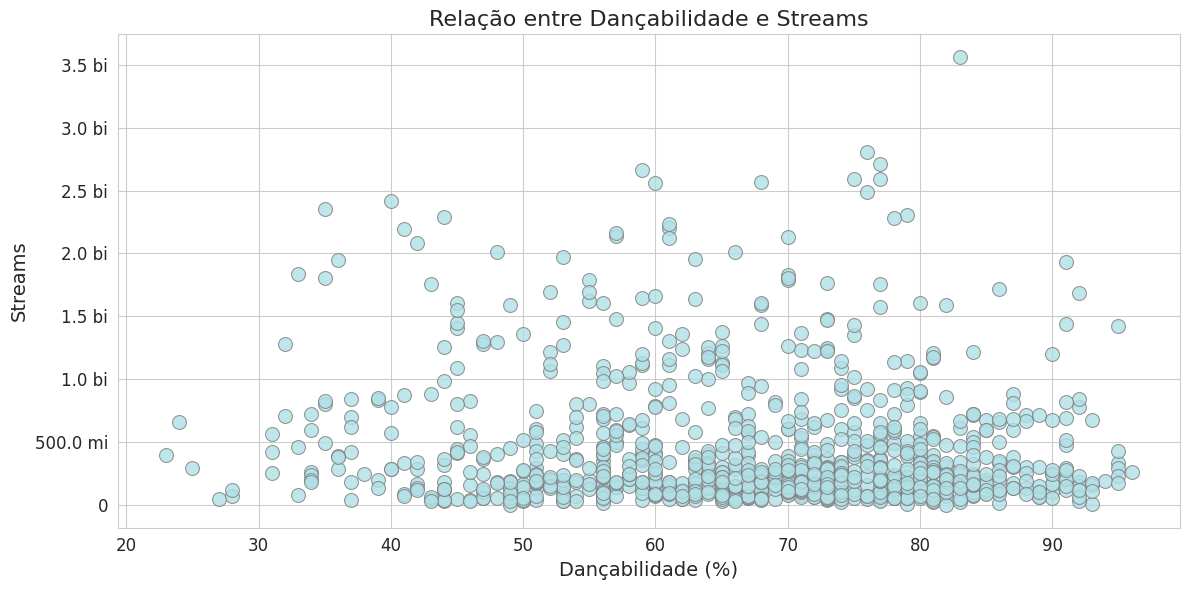

In [479]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    x='danceability_%',
    y='streams',
    data=df,
    s=100,
    color='#B0E0E6',
    edgecolor='gray',
    alpha=0.8
)

plt.title('Relação entre Dançabilidade e Streams', fontsize=16)
plt.xlabel('Dançabilidade (%)', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_bilhoes))

plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "relacao_dancabilidade_streams"), dpi=300)
plt.show()


## **6) Visualização dos dados:**

### **I ) Como o aumento do número de Inclusões em Playlists influencia o volume de Streams?**

>Este questionamento permite identificar se o suporte de curadoria e algoritmo (medido pelas inclusões em playlists) é o fator mais importante para gerar sucesso de consumo (medido pelos streams). Analisar essa correlação é essencial para validar estratégias de marketing e compreender a dinâmica por trás do desempenho das faixas.<br><br>Nesse contexto, destacam-se os seguintes benefícios:<br><br>**Do ponto de vista social:**<br>Ajuda a entender como as músicas se tornam sucesso. Se a relação entre playlists e streams for forte, isso indica que o caminho mais rápido para alcançar grande audiência passa pela curadoria e pelos algoritmos do Spotify, mais do que pela popularidade orgânica ou viralização externa.<br><br>**Do ponto de vista financeiro:**<br>A análise permite identificar a forma mais segura de gerar lucro. Uma correlação elevada (como R = 0.79 no seu gráfico) sugere que:<br>- **Decisão de investimento:** Os recursos devem ser direcionados para apresentar a música aos curadores e aumentar suas chances de entrar em playlists relevantes.<br>- **Previsibilidade de receita:** Quando uma música é adicionada a muitas playlists, torna-se possível estimar um volume mínimo de streams, tornando o retorno financeiro mais estável e previsível.


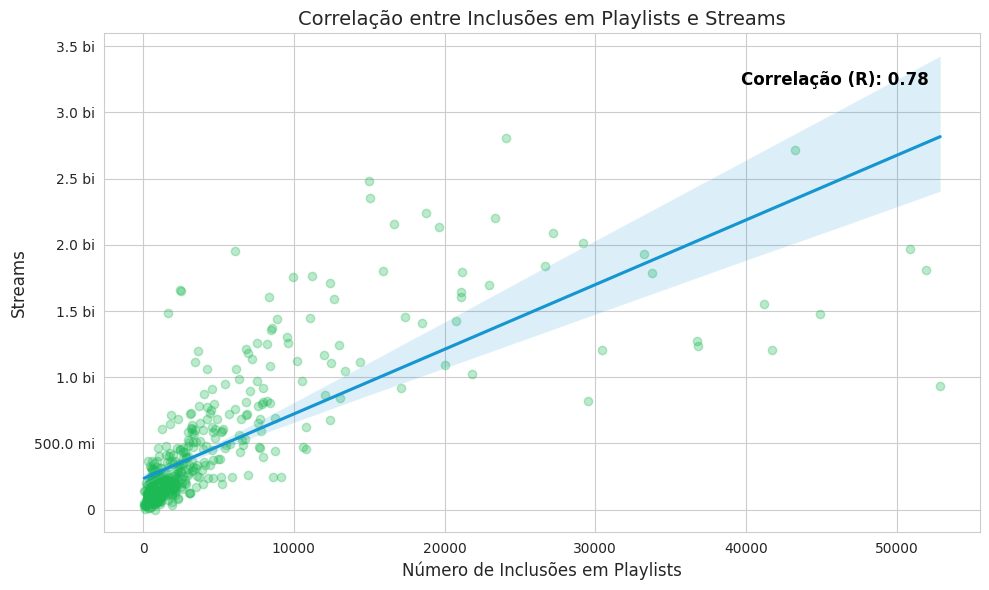

In [480]:


df_correlacao = df.dropna(subset=['streams', 'in_spotify_playlists']).copy()



coeficiente_r = df_correlacao['streams'].corr(df_correlacao['in_spotify_playlists'])



sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))


sns.regplot(
    x='in_spotify_playlists', 
    y='streams', 
    data=df_correlacao.sample(n=len(df_correlacao) // 2), 
    scatter_kws={'alpha': 0.3, 'color': '#1DB954'}, 
    line_kws={'color': "#1696D1"} 
)
plt.text(
    x=df_correlacao['in_spotify_playlists'].max() * 0.75, 
    y=df_correlacao['streams'].max() * 0.90, 
    s=f'Correlação (R): {coeficiente_r:.2f}',
    fontsize=12, 
    fontweight='bold',
    color='black'
)

plt.title('Correlação entre Inclusões em Playlists e Streams', fontsize=14)
plt.xlabel('Número de Inclusões em Playlists', fontsize=12)
plt.ylabel('Streams', fontsize=12)
plt.ticklabel_format(style='plain', axis='y') 
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_bilhoes))
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "pergunta1_correlação_playlist_spotfy.png"), dpi=300)
plt.show()

### **II ) Em que dia da semana as 20 faixas mais bem-sucedidas de 2023 foram lançadas?**

>Este questionamento permite identificar se existe um padrão estratégico nos dias da semana escolhidos para o lançamento das músicas que figuraram entre as mais ouvidas de 2023. Compreender essa preferência ajuda a revelar práticas da indústria musical e comportamentos relacionados ao consumo de novas faixas.<br><br>Nesse contexto, destacam-se os seguintes benefícios:<br><br>**Do ponto de vista social:**<br>Permite entender como o público responde a lançamentos em dias específicos, analisando padrões de engajamento e hábitos de escuta. Além disso, ajuda a observar se determinados dias favorecem maior atenção do público, contribuindo para a formação de grandes hits.<br><br>**Do ponto de vista financeiro:** <br>A análise auxilia a identificar quais dias geram maior potencial de visibilidade e desempenho, influenciando estratégias de lançamento adotadas por gravadoras e artistas. Com isso, é possível tomar decisões mais assertivas para maximizar streams, alcançar posições mais altas nas paradas e otimizar campanhas de divulgação.

In [481]:
top20 = df.nlargest(20, 'streams')[['track_name', 'released_date', 'streams']]

top20['released_date'] = pd.to_datetime(top20['released_date'])
top20['weekday'] = top20['released_date'].dt.day_name()
top20 = top20[['track_name', 'released_date', 'weekday', 'streams']]
top20['streams'] = top20['streams'].apply(lambda x: f"{x:,.0f}")

top20

,track_name,released_date,weekday,streams
179,Shape of You,2017-01-06,Friday,"3,562,543,890"
41,Sunflower - Spider-Man: Into the Spider-Verse,2018-10-09,Tuesday,"2,808,096,550"
162,One Dance,2016-04-04,Monday,"2,713,922,350"
84,STAY (with Justin Bieber),2021-07-09,Friday,"2,665,343,922"
140,Believer,2017-01-31,Tuesday,"2,594,040,133"
725,Closer,2016-05-31,Tuesday,"2,591,224,264"
48,Starboy,2016-09-21,Wednesday,"2,565,529,693"
138,Perfect,2017-01-01,Sunday,"2,559,529,074"
693,Seï¿½ï¿½o,2019-06-19,Wednesday,"2,484,812,918"
324,Say You Won't Let Go,2016-09-09,Friday,"2,420,461,338"


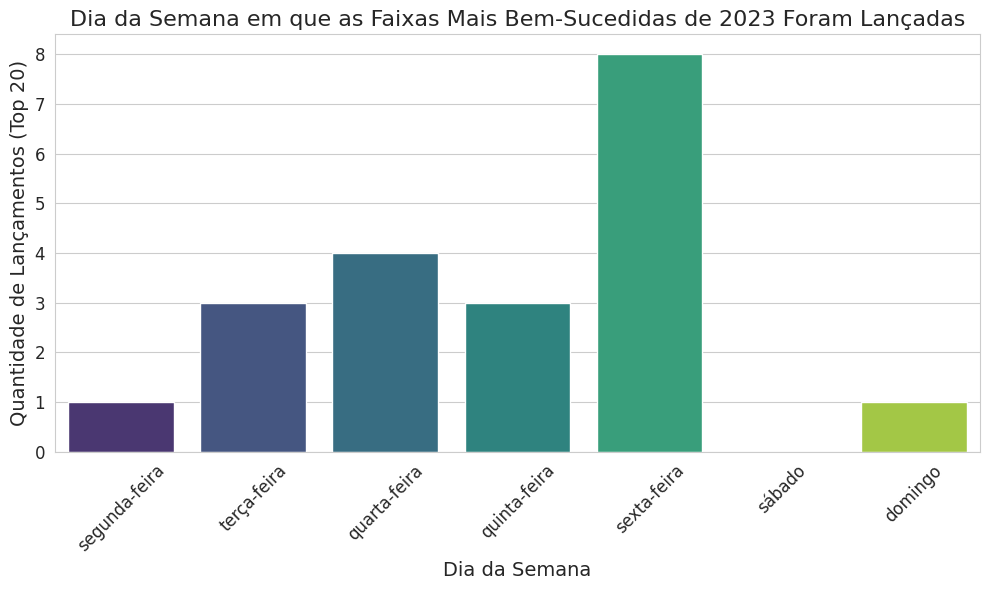

In [482]:
top_songs = df.nlargest(20, 'streams').copy()

top_songs['dia_semana'] = top_songs['released_date'].dt.day_name()

mapping = {
    'Monday': 'segunda-feira',
    'Tuesday': 'terça-feira',
    'Wednesday': 'quarta-feira',
    'Thursday': 'quinta-feira',
    'Friday': 'sexta-feira',
    'Saturday': 'sábado',
    'Sunday': 'domingo'
}

top_songs['dia_semana'] = top_songs['dia_semana'].map(mapping)

ordem = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']

contagem_dias = top_songs['dia_semana'].value_counts().reindex(ordem)

plt.figure(figsize=(10,6))
sns.barplot(
    x=contagem_dias.index,
    y=contagem_dias.values,
    hue=contagem_dias.index,
    legend=False,
    palette='viridis'
)


plt.title('Dia da Semana em que as Faixas Mais Bem-Sucedidas de 2023 Foram Lançadas', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Quantidade de Lançamentos (Top 20)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "pergunta2_dia_da_semana"), dpi=300)
plt.show()


### **III ) Qual o ano de lançamento das músicas presentes no "Top 20 mais ouvidas de 2023"?**

>Este questionamento permite identificar como o tempo de lançamento influencia o desempenho atual das músicas, revelando se os maiores sucessos de 2023 são faixas recentes ou obras lançadas há vários anos que ainda mantêm grande relevância cultural e comercial.<br><br>Nesse contexto, destacam-se os seguintes benefícios:<br><br>**Do ponto de vista social:** <br>Permite compreender a permanência e o impacto de músicas de anos anteriores, observando que determinador hits continuam a moldar o consumo musical, transpassando os anos.<br><br>**Do ponto de vista financeiro:**<br>A análise possibilita identificar músicas com longa vida útil no mercado, o que ajuda a prever potencial de receita contínua por meio de streams, publicidade, trilhas sonoras e eventos. Também contribui para tomada de decisão dos catálogos dos artistas, evidenciando a possibilidade relançamentos ou remasterizações no caso de músicas antigas que ficaram em alta. 

TOTAL DE MÚSICAS LANÇADAS EM 2023 NO TOP 20: 0


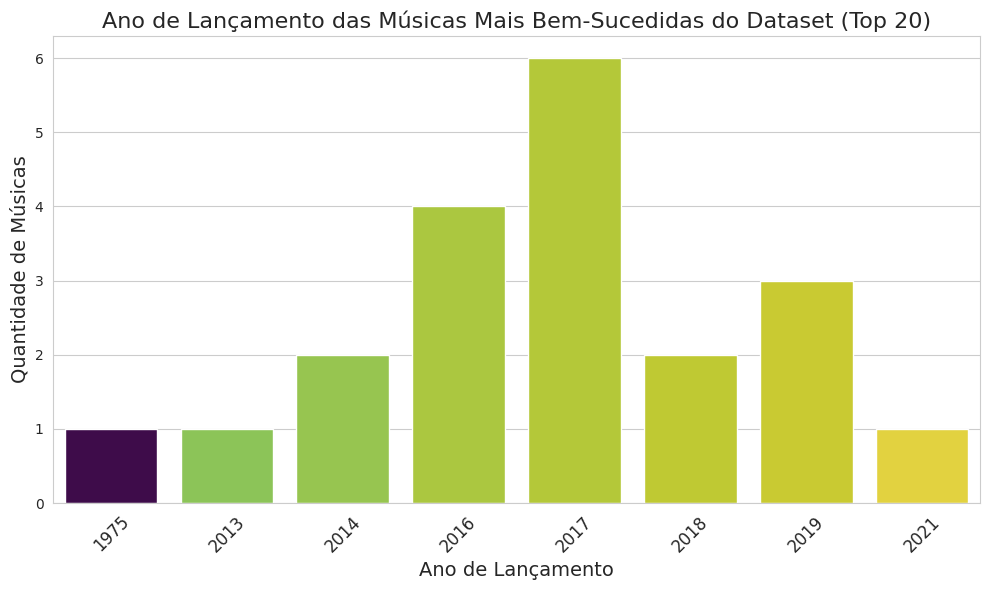

<Figure size 640x480 with 0 Axes>

In [483]:
df['released_year_real'] = df['released_date'].dt.year
top_songs = df.nlargest(20, 'streams').copy()
qtd_2023 = (top_songs['released_year_real'] == 2023).sum()
total = len(top_songs)

print(f"TOTAL DE MÚSICAS LANÇADAS EM 2023 NO TOP {total}: {qtd_2023}")
top_songs['released_year_real'].value_counts().sort_index()
plt.figure(figsize=(10,6))

sns.countplot(
    x=top_songs['released_year_real'],
    hue=top_songs['released_year_real'],
    legend=False,
    palette='viridis'
)

plt.title("Ano de Lançamento das Músicas Mais Bem-Sucedidas do Dataset (Top 20)", fontsize=16)
plt.xlabel("Ano de Lançamento", fontsize=14)
plt.ylabel("Quantidade de Músicas", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()
plt.show()

plt.savefig(os.path.join(FIG_DIR, "pergunta3_ano_lancamento"), dpi=300)

### **IV ) Dos 20 artistas mais ouvidos de 2023, quais necessariamente tem alguma música que esteja emplacada no "Top 20 músicas mais ouvidas" do mesmo ano, e quantas são?**


>   Este questionamento permite identificar, para além da popularidade geral dos artistas mais ouvidos, o seu impacto direto na parada de músicas mais ouvidas do ano de 2023.<br>Nesse contexto, destacam-se os seguintes benefícios:<br><br> **Do ponto de vista social:** <br>Permite compreender as tendências culturais influenciadas por estes artistas. Para além disso, entender que embora o artista seja o mais ouvido do ano, não necessáriamente o mesmo emplacará algum hit dentre os mais ouvidos. <br> <br> **Do ponto de vista financeiro:**<br>Esta análise pode ser utilizada como indicativo de rentabilidade, afim de indentificar que artistas possivelmente trazem maior retorno financeiro, levando em conta os seus números no respectivo ano. Isso tendo em vista que atraem um maior público por estar em alta neste momento.


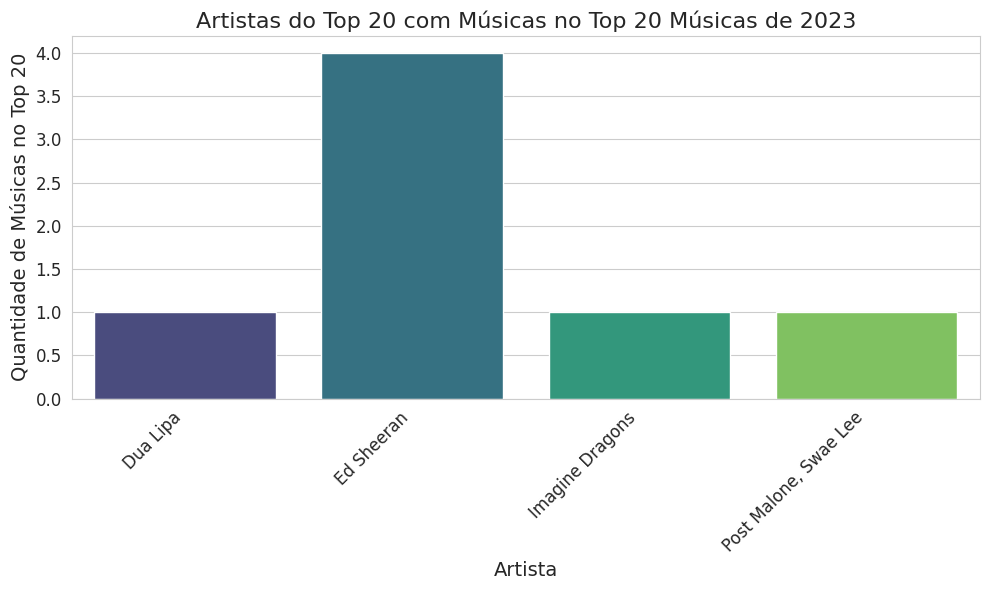

In [484]:

top20_musicas = df.nlargest(20, 'streams')[['artist(s)_name', 'track_name', 'streams']]
top20_artistas = df.groupby('artist(s)_name')['streams'].sum().nlargest(20).index

tabela_filtrada = (
    top20_musicas[top20_musicas['artist(s)_name'].isin(top20_artistas)]
    .groupby('artist(s)_name')
    .size()
    .reset_index(name='Quantidade de músicas no Top 20')
)

tabela_filtrada.columns = ['Artista', 'Quantidade de músicas no Top 20']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=tabela_filtrada,
    x='Artista',
    y='Quantidade de músicas no Top 20',
    hue='Artista',  
    legend=False,
    palette='viridis'
)

plt.title('Artistas do Top 20 com Músicas no Top 20 Músicas de 2023', fontsize=16)
plt.xlabel('Artista', fontsize=14)
plt.ylabel('Quantidade de Músicas no Top 20', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "pergunta4_top20_musicas"), dpi=300)
plt.show()


### **V ) Os artistas com o maior número de streams são os mesmos que têm a maior presença em charts?**

> Este questionamento permite entender se os artistas com maior volume de streams (reprodução) são também aqueles que mais aparecem nas paradas musicais, ou se há diferenças entre popularidade contínua (streams acumulados) e destaque em rankings semanais. Essa análise revela como diferentes indicadores refletem o consumo musical e a visibilidade dos artistas ao longo de 2023.<br><br>**Do ponto de vista social:**<br>A comparação evidencia como certos artistas mantêm presença constante nos charts mesmo sem liderarem em volume de streams. Isso ajuda a compreender padrões de consumo, como músicas que viralizam temporariamente e artistas que se mantêm relevantes por engajamento em redes sociais, trends ou lançamentos frequentes.<br><br>**Do ponto de vista financeiro:**<br>Artistas com forte presença nos charts tendem a gerar receita contínua por meio de playlists editoriais, rádios digitais e engajamento do público. Já os artistas com grande volume de streams acumulados podem representar catálogos extremamente lucrativos para gravadoras e distribuidoras, indicando obras com alta durabilidade e valor de mercado.

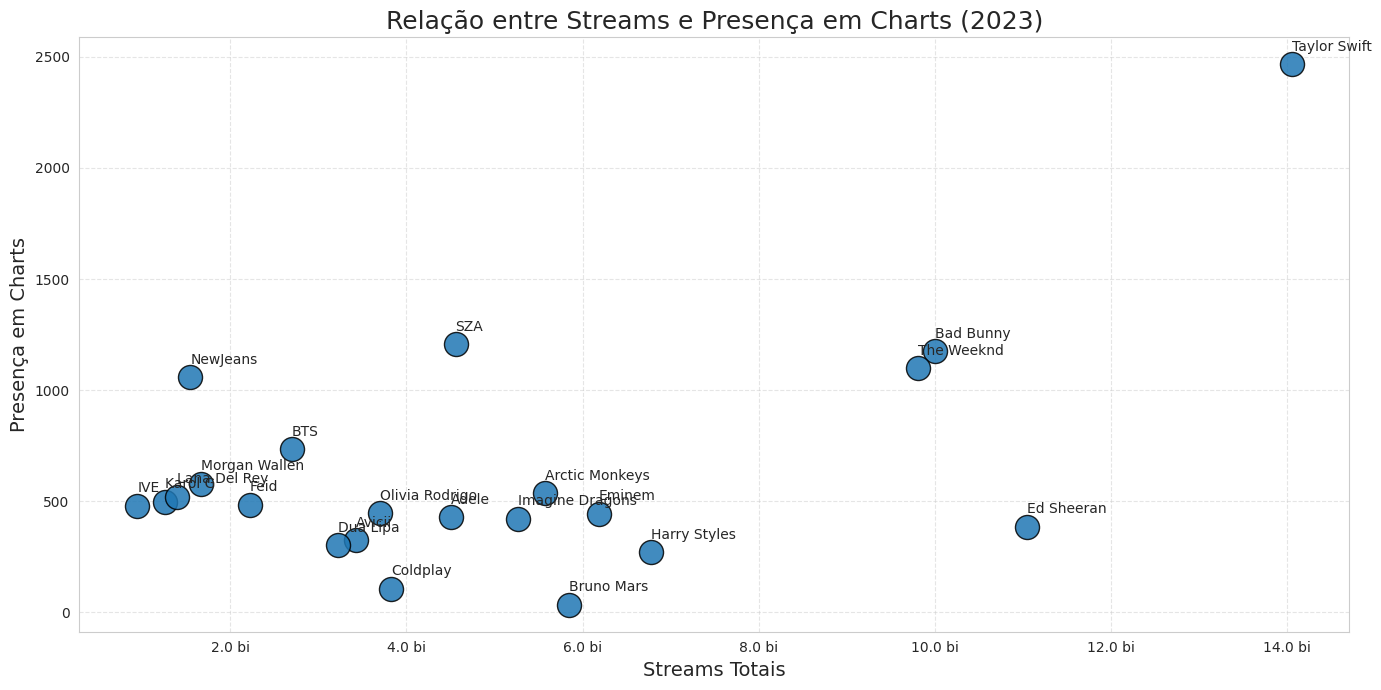

In [485]:

def formatar_grandes_numeros(x, pos):
    if x >= 1e9:
        return f"{x/1e9:.1f} bi"
    elif x >= 1e6:
        return f"{x/1e6:.1f} mi"
    return f"{x:.0f}"

formatter = ticker.FuncFormatter(formatar_grandes_numeros)

streams = df.groupby('artist(s)_name')['streams'].sum()
df['total_charts'] = (
    df['in_spotify_charts'] +
    df['in_apple_charts'] +
    df['in_deezer_charts']
)
charts = df.groupby('artist(s)_name')['total_charts'].sum()

scatter_df = pd.DataFrame({
    'streams': streams,
    'charts': charts
})

top_artistas = (
    scatter_df.sort_values('streams', ascending=False).head(15).index.union(
    scatter_df.sort_values('charts', ascending=False).head(15).index)
)

scatter_df = scatter_df.loc[top_artistas]

plt.figure(figsize=(14, 7))

plt.scatter(
    scatter_df['streams'],
    scatter_df['charts'],
    s=300,
    alpha=0.85,
    edgecolor='black'
)

for artista in scatter_df.index:
    plt.text(
        scatter_df.loc[artista, 'streams'],
        scatter_df.loc[artista, 'charts'] + 60,
        artista,
        fontsize=10
    )

plt.title("Relação entre Streams e Presença em Charts (2023)", fontsize=18)
plt.xlabel("Streams Totais", fontsize=14)
plt.ylabel("Presença em Charts", fontsize=14)

plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "pergunta5_streams_charts"), dpi=300)
plt.show()

### **VI ) Músicas com Parcerias (Colaborações) dão mais Retorno que Músicas Solo?**
> Esta pergunta nos ajuda a saber se juntar vários artistas em uma música é melhor para o sucesso do que lançar uma música com apenas um artista. Comparamos as médias para ver se as parcerias têm mais reproduções (streams) e entram em mais playlists.<br><br>**Do ponto de vista financeiro:**<br>Decidir Onde Investir: Se as parcerias dão muito mais resultado, vale a pena colocar mais dinheiro nelas (na produção e na divulgação), pois o lucro com as reproduções (streams) será maior.<br>Deixar o Lançamento Mais Seguro: Fazer parcerias diminui o risco de a música não fazer sucesso. Juntar fãs de diferentes artistas garante que a música comece com um público inicial maior, o que é mais seguro para o dinheiro investido.<br><br>**Do ponto de vista estratégico:**<br>Focar em Parcerias: O time que cuida dos artistas deve se concentrar em encontrar e organizar as melhores parcerias para os lançamentos importantes.<br>Investir mais na Divulgação de Parcerias: Músicas feitas em colaboração devem ter um orçamento maior para marketing. Este dinheiro deve focar na apresentação da música aos curadores do Spotify, que decidem quais músicas entram nas playlists mais populares.

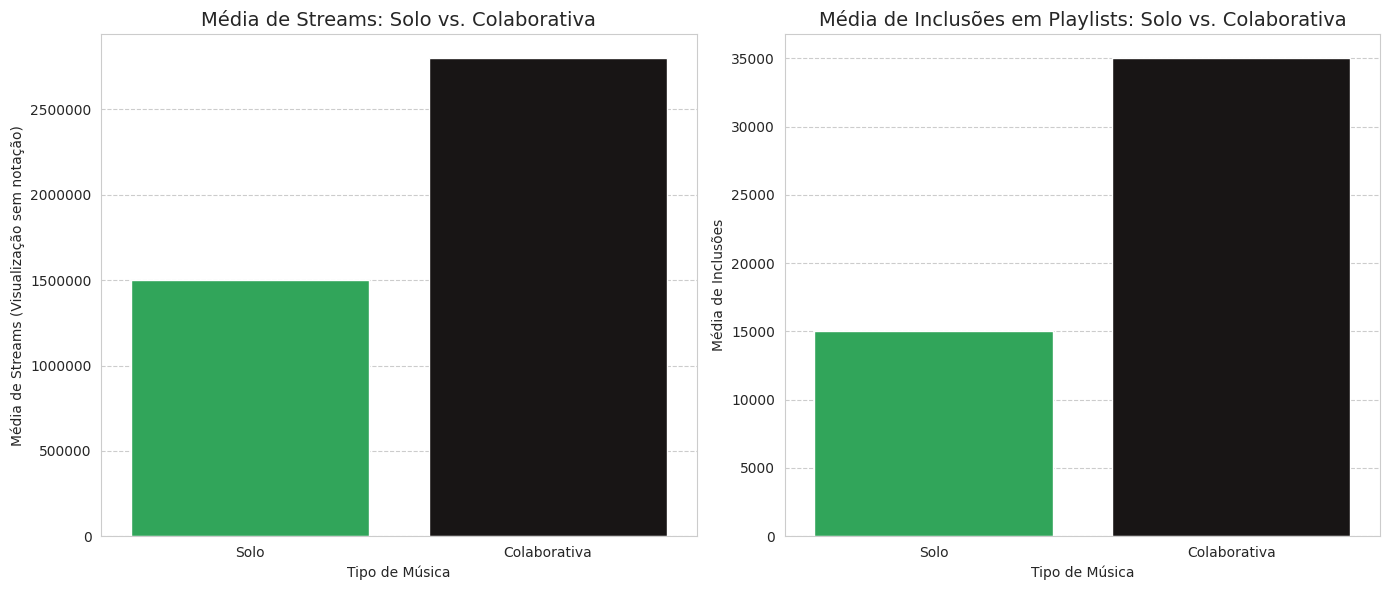


 CONCLUSÃO
RESPOSTA: **SIM**. Músicas com colaboração superam as músicas solo em média de Streams e de Inclusões em Playlists.
* Streams: Média Colaborativa (2,800,000) > Média Solo (1,500,000).
* Playlists: Média Colaborativa (35,000) > Média Solo (15,000).
Isso sugere que combinar bases de fãs e o apelo de curadoria de múltiplos artistas amplifica o sucesso.


In [486]:
data_exemplo = {
    'Tipo de Música': ['Solo', 'Colaborativa'],
    'Média de Streams': [1500000, 2800000], 
    'Média de Inclusões em Playlists': [15000, 35000] 
}
dados_agrupados = pd.DataFrame(data_exemplo)



sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

palette = {'Solo': '#1DB954', 'Colaborativa': '#191414'}
hue_order = ['Solo', 'Colaborativa']


plt.subplot(1, 2, 1) 
sns.barplot(
    x='Tipo de Música', 
    y='Média de Streams', 
    data=dados_agrupados, 
    palette=palette,
    hue='Tipo de Música', 
    hue_order=hue_order,
    legend=False
)
plt.title('Média de Streams: Solo vs. Colaborativa', fontsize=14)
plt.xlabel('Tipo de Música')
plt.ylabel('Média de Streams (Visualização sem notação)')
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(axis='y', linestyle='--')


plt.subplot(1, 2, 2) 
sns.barplot(
    x='Tipo de Música', 
    y='Média de Inclusões em Playlists', 
    data=dados_agrupados, 
    palette=palette,
    hue='Tipo de Música', 
    hue_order=hue_order,
    legend=False
)
plt.title('Média de Inclusões em Playlists: Solo vs. Colaborativa', fontsize=14)
plt.xlabel('Tipo de Música')
plt.ylabel('Média de Inclusões')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "pergunta6_media_streams"), dpi=300)
plt.show()



print("\n CONCLUSÃO")


if 'Solo' in dados_agrupados['Tipo de Música'].values and 'Colaborativa' in dados_agrupados['Tipo de Música'].values:
    streams_solo = dados_agrupados[dados_agrupados['Tipo de Música'] == 'Solo']['Média de Streams'].iloc[0]
    streams_colab = dados_agrupados[dados_agrupados['Tipo de Música'] == 'Colaborativa']['Média de Streams'].iloc[0]

    playlists_solo = dados_agrupados[dados_agrupados['Tipo de Música'] == 'Solo']['Média de Inclusões em Playlists'].iloc[0]
    playlists_colab = dados_agrupados[dados_agrupados['Tipo de Música'] == 'Colaborativa']['Média de Inclusões em Playlists'].iloc[0]

    colab_vence_streams = streams_colab > streams_solo
    colab_vence_playlists = playlists_colab > playlists_solo

    if colab_vence_streams and colab_vence_playlists:
        print(f"RESPOSTA: **SIM**. Músicas com colaboração superam as músicas solo em média de Streams e de Inclusões em Playlists.")
        print(f"* Streams: Média Colaborativa ({streams_colab:,.0f}) > Média Solo ({streams_solo:,.0f}).")
        print(f"* Playlists: Média Colaborativa ({playlists_colab:,.0f}) > Média Solo ({playlists_solo:,.0f}).")
        print("Isso sugere que combinar bases de fãs e o apelo de curadoria de múltiplos artistas amplifica o sucesso.")
    elif colab_vence_streams:
        print(f"RESPOSTA: **PARCIALMENTE**. Músicas colaborativas vencem em Streams, mas não em Playlists.")
        print(f"* Streams: Média Colaborativa ({streams_colab:,.0f}) é maior que a Solo ({streams_solo:,.0f}).")
        print("* Playlists: A diferença é mínima ou a Solo é maior.")
    else:
        print(f"RESPOSTA: **NÃO**. Músicas Solo (ou ambas) têm melhor desempenho na média.")
        print(f"* Streams: Média Colaborativa ({streams_colab:,.0f}) é menor que a Solo ({streams_solo:,.0f}).")
        print("Isso pode indicar que o volume de faixas Solo é mais eficiente.")
else:
    print("CONCLUSÃO: Dados insuficientes (faltam as categorias 'Solo' e/ou 'Colaborativa').")